<a href="https://colab.research.google.com/github/LuizhbTavares/alugueiscasas/blob/main/Construindo_um_modelo_de_Regress%C3%A3o_para_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

%pip install plotly
%pip install cufflinks
%pip install chart-studio
import chart_studio.plotly as py

import cufflinks as cf
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/MKT.csv", sep=",")

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [ ]:
df['Total_gasto_por_mes'] = df[['youtube', 'facebook', 'newspaper']].sum(axis = 1)
df.head()

,youtube,facebook,newspaper,sales,Total_gasto_por_mes
0,84.72,19.20,48.96,12.60,152.88
1,351.48,33.96,51.84,25.68,437.28
2,135.48,20.88,46.32,14.28,202.68
3,116.64,1.80,36.00,11.52,154.44
4,318.72,24.00,0.36,20.88,343.08


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales,Total_gasto_por_mes
count,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,240.932632
std,102.449597,17.913532,24.902918,6.314608,112.167551
min,0.840000,0.000000,0.360000,1.920000,25.680000
25%,91.080000,11.700000,13.740000,12.540000,146.820000
50%,179.760000,26.760000,31.080000,15.480000,248.400000
75%,262.980000,43.680000,50.880000,20.820000,337.740000
max,355.680000,59.520000,121.080000,32.400000,520.320000


In [ ]:
fig = px.box(df, x="Total_gasto_por_mes")
fig.update_traces(line_color="blue")

In [ ]:
fig = px.box(df, x="sales")
fig.update_traces(line_color="blue")

In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales', 'Total_gasto_por_mes'], dtype='object')

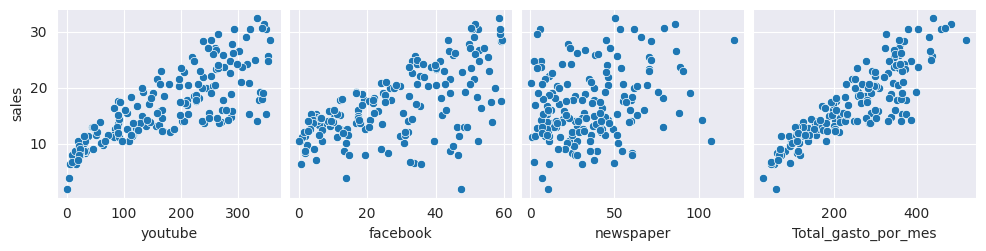

In [ ]:
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper', 'Total_gasto_por_mes'], y_vars='sales');

In [ ]:
df.corr()

,youtube,facebook,newspaper,sales,Total_gasto_por_mes
youtube,1.000000,0.086538,0.110759,0.782030,0.951773
facebook,0.086538,1.000000,0.293425,0.602918,0.303889
newspaper,0.110759,0.293425,1.000000,0.254987,0.370040
sales,0.782030,0.602918,0.254987,1.000000,0.867176
Total_gasto_por_mes,0.951773,0.303889,0.370040,0.867176,1.000000


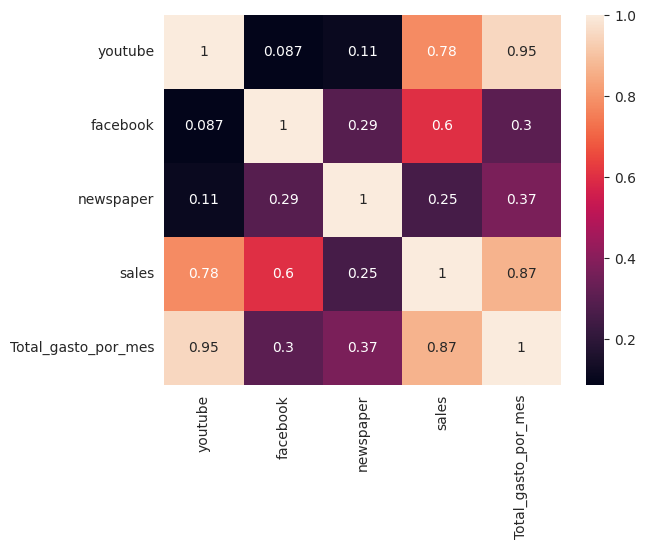

In [ ]:
sns.heatmap(df.corr(), annot=True);

In [ ]:
valor_gasto_todo_periodo = df[['Total_gasto_por_mes']].sum()
valor_gasto_todo_periodo

Total_gasto_por_mes    41199.48
dtype: float64

In [ ]:
valor_convertido_em_venda = df[['sales']].sum()
valor_convertido_em_venda

sales    2893.8
dtype: float64

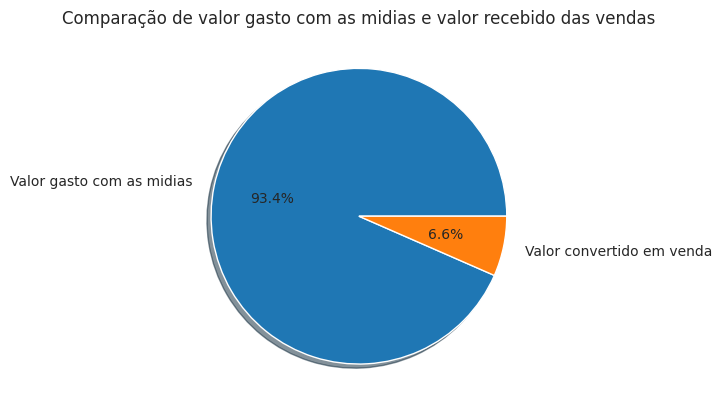

In [ ]:
names='Valor gasto com as midias', 'Valor convertido em venda',
values=[41199.48, 2893.8]

sns.set_style('darkgrid')
plt.pie(values, labels=names, labeldistance=1.15, autopct='%1.1f%%', shadow=True);
plt.title('Comparação de valor gasto com as midias e valor recebido das vendas')
plt.show();


In [ ]:
df.insert(5, 'mes', df.index)
df

,youtube,facebook,newspaper,sales,Total_gasto_por_mes,mes
0,84.72,19.20,48.96,12.60,152.88,0
1,351.48,33.96,51.84,25.68,437.28,1
2,135.48,20.88,46.32,14.28,202.68,2
3,116.64,1.80,36.00,11.52,154.44,3
4,318.72,24.00,0.36,20.88,343.08,4
...,...,...,...,...,...,...
166,45.84,4.44,16.56,9.12,66.84,166
167,113.04,5.88,9.72,11.64,128.64,167
168,212.40,11.16,7.68,15.36,231.24,168
169,340.32,50.40,79.44,30.60,470.16,169


In [ ]:
fig = px.line(df, x="mes", y="Total_gasto_por_mes")
fig.update_layout(title='Relação entre os valores gastos com as midias pelos meses.',
                   xaxis_title='Meses', yaxis_title='Valores gastos com mídias')

In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales', 'Total_gasto_por_mes',
       'mes'],
      dtype='object')

In [ ]:
x = df[['youtube', 'facebook', 'newspaper']]

y =  df[['sales']]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_previsao = lm.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(Y_test, y_previsao)
print("r_quadrado:", r)

r_quadrado: 0.882423505618885


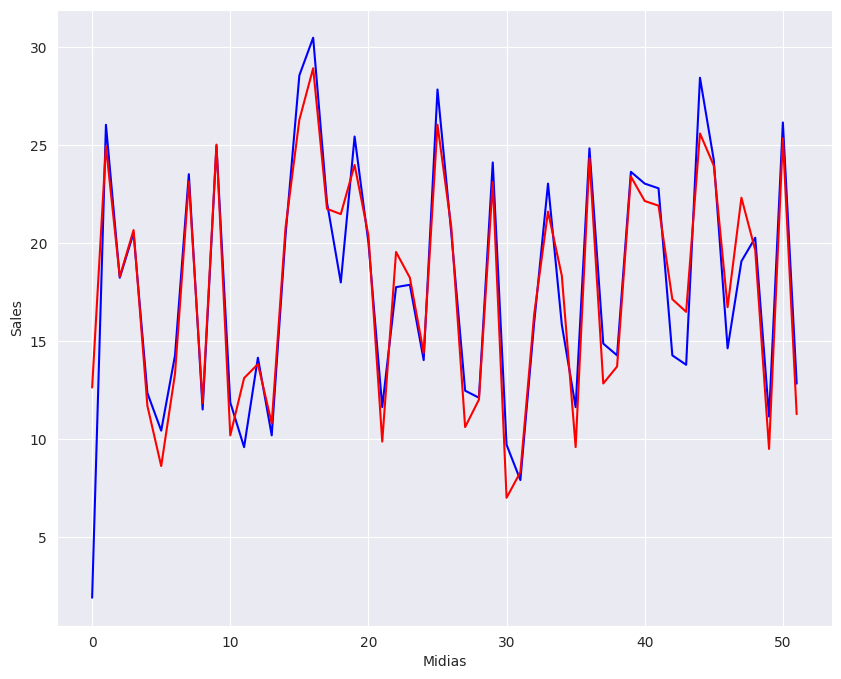

In [ ]:
c = [i for i in range(0, 52, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, Y_test, color="blue")
plt.plot(c, y_previsao, color="red")
plt.xlabel("Midias")
plt.ylabel("Sales");

In [ ]:
df.describe()

,youtube,facebook,newspaper,sales,Total_gasto_por_mes,mes
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807,240.932632,85.000000
std,102.449597,17.913532,24.902918,6.314608,112.167551,49.507575
min,0.840000,0.000000,0.360000,1.920000,25.680000,0.000000
25%,91.080000,11.700000,13.740000,12.540000,146.820000,42.500000
50%,179.760000,26.760000,31.080000,15.480000,248.400000,85.000000
75%,262.980000,43.680000,50.880000,20.820000,337.740000,127.500000
max,355.680000,59.520000,121.080000,32.400000,520.320000,170.000000


In [ ]:
youtube = 355.68
facebook = 59.52
newspaper = 121.08

entrada =[[youtube, facebook, newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([30.92644002])

In [ ]:
youtube = 200
facebook = 150
newspaper = 100

entrada =[[youtube, facebook, newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([40.90557156])

In [ ]:
youtube = 200
facebook = 200
newspaper = 50

entrada =[[youtube, facebook, newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([50.31549038])

In [ ]:
youtube = 225
facebook = 225
newspaper = 0

entrada =[[youtube, facebook, newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([56.15430749])